In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import TruncatedSVD

# Load the dataset
file_path = "C:\\Users\\user\\AppData\\Local\\Temp\\55017340-9c0d-4a1b-884c-1f80e8ea40db_SVM.zip.0db\\SVM\\mushroom.csv"
df = pd.read_csv(file_path)

In [24]:
# Task 1: Exploratory Data Analysis (EDA)
# 1. Fundamental Data Exploration
print("First few rows of the dataset:")
print(df.head())
print("\nColumn names:")
print(df.columns)
print("\nData types of each column:")
print(df.dtypes)
print("\nMissing values in each column:")
print(df.isnull().sum())

First few rows of the dataset:
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_

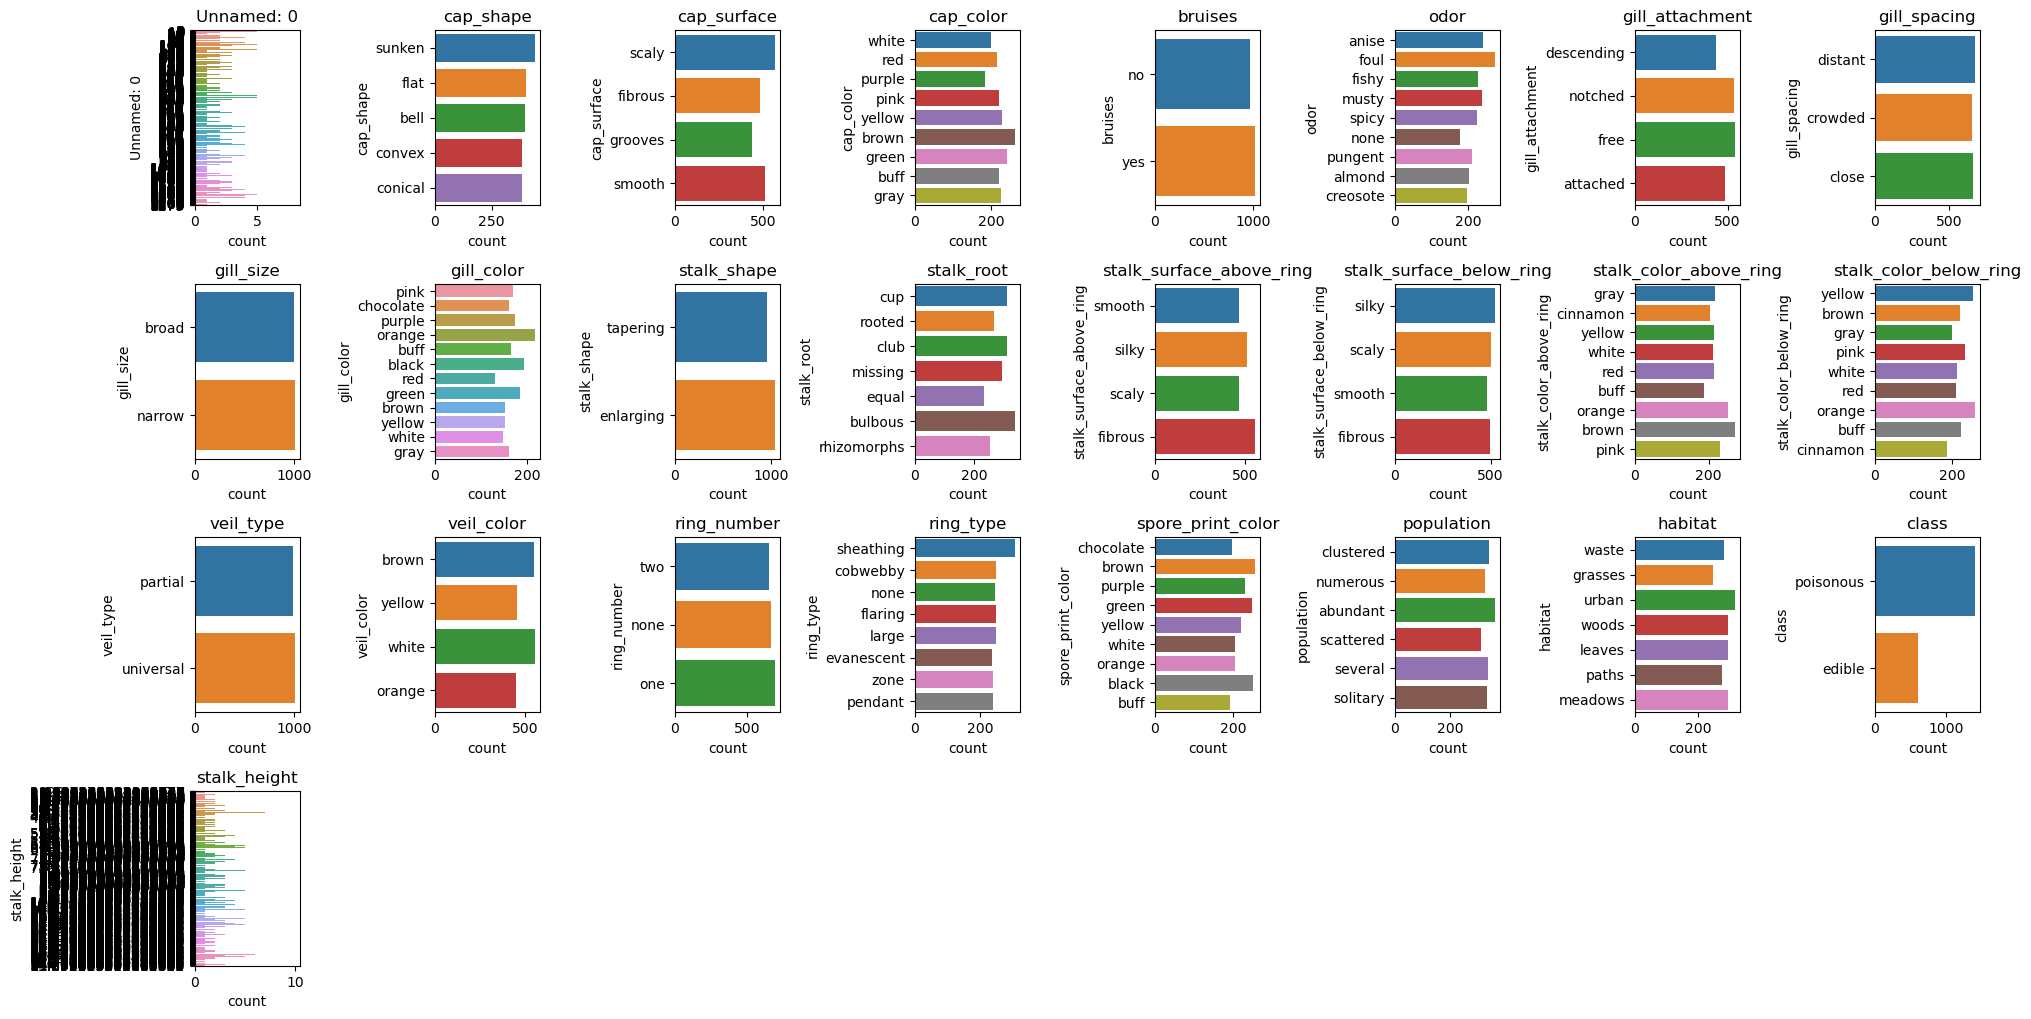

In [25]:
# 2. Feature Distributions
plt.figure(figsize=(20, 20))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude the target column for feature distribution
    plt.subplot(8, 8, i)
    sns.countplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

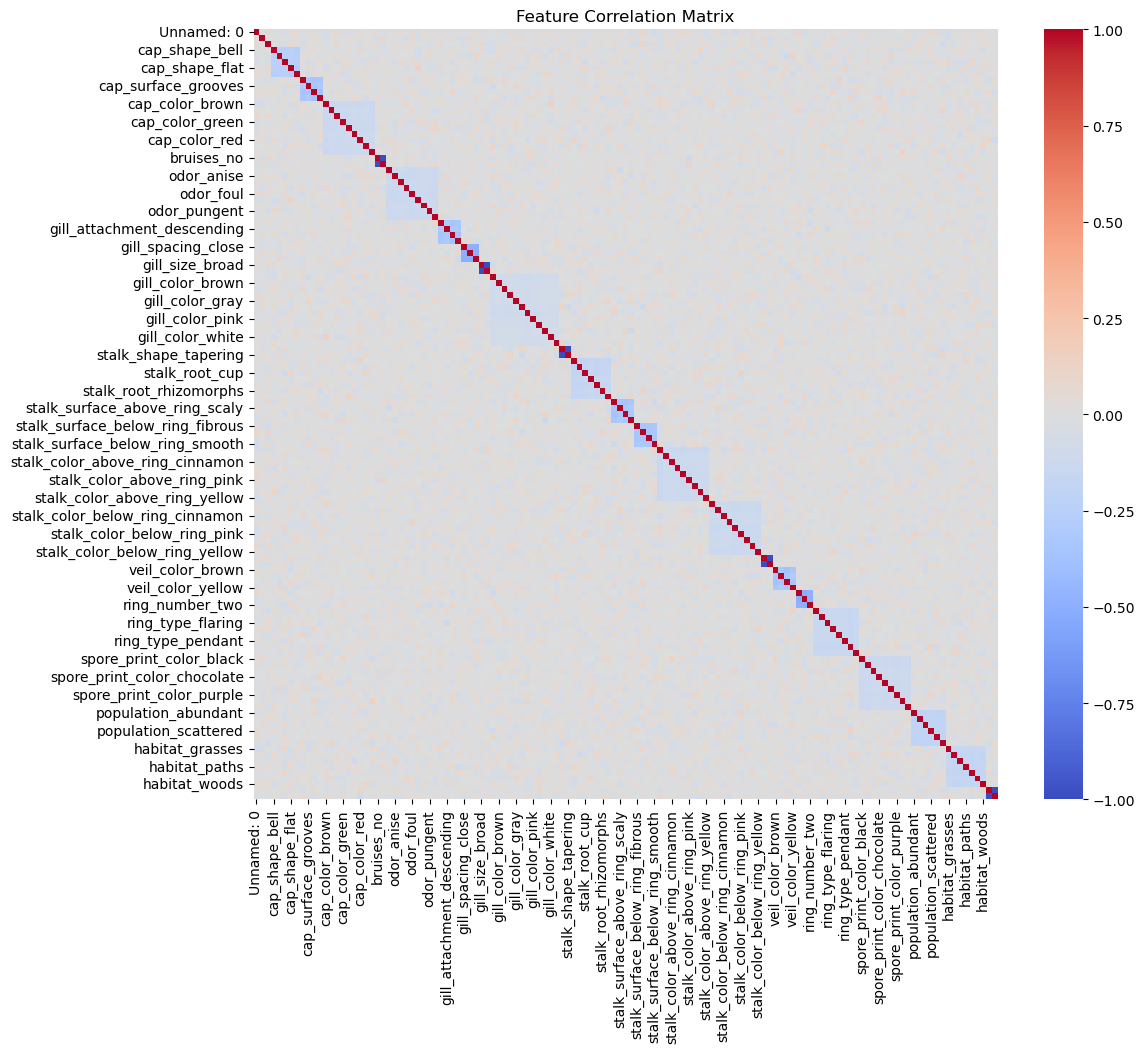

In [26]:

# 3. Investigate Feature Correlations
# Convert categorical data to dummy variables
df_dummies = pd.get_dummies(df)
correlation_matrix = df_dummies.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [27]:
# Task 2: Data Preprocessing
# 1. Encode categorical variables
# 'class' is the target variable
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), X.columns)  # Apply one-hot encoding to all columns
    ],
    remainder='passthrough'
)

# Apply preprocessing to the feature set
X_processed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Standardize features using MaxAbsScaler
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

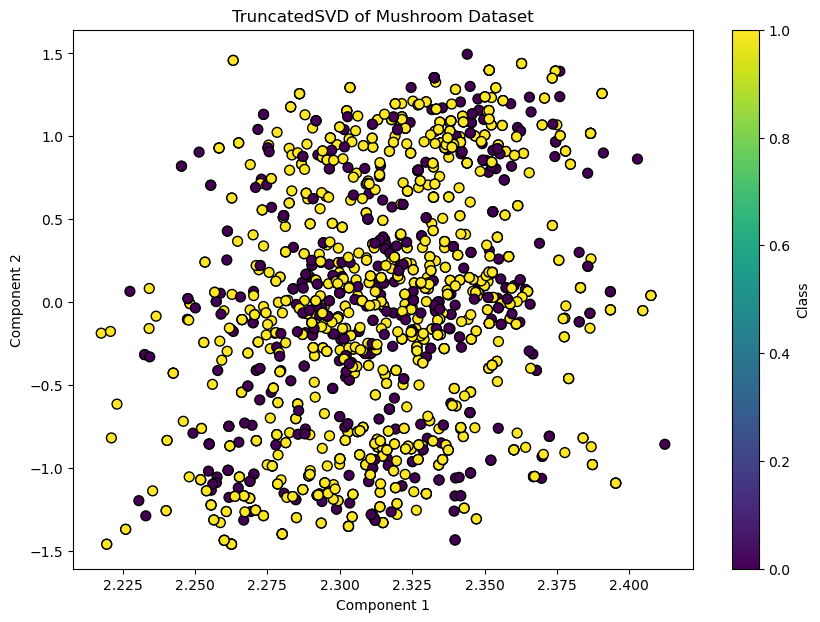

In [28]:

# Task 3: Data Visualization
# 1. Scatter plots or pair plots
# Reduce dimensions for visualization using TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='Class')
plt.title('TruncatedSVD of Mushroom Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

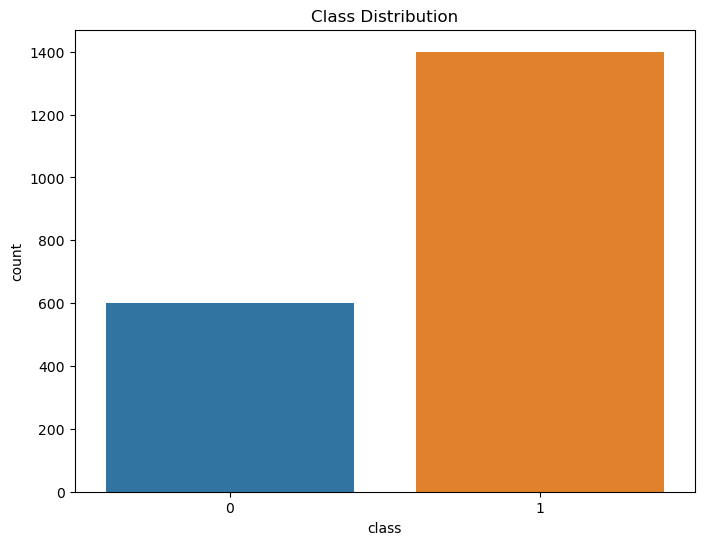

In [29]:
# 2. Visualize class distributions
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

In [30]:
# Task 4: SVM Implementation
# 1. Implement SVM classifier
svm = SVC(kernel='linear')  # Start with a linear kernel
svm.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [31]:
# 2. Predict and evaluate performance
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'\nAccuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-Score: 0.87

Classification Report:
              precision    recall  f1-score   support

      edible       0.89      0.71      0.79       133
   poisonous       0.87      0.96      0.91       267

    accuracy                           0.87       400
   macro avg       0.88      0.83      0.85       400
weighted avg       0.87      0.87      0.87       400



In [33]:
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC

# Reduce dimensions for visualization using TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train_scaled)
X_test_svd = svd.transform(X_test_scaled)

# Train SVM on the reduced features
svm_svd = SVC(kernel='linear')  # You can use different kernels here
svm_svd.fit(X_train_svd, y_train)


SVC(kernel='linear')

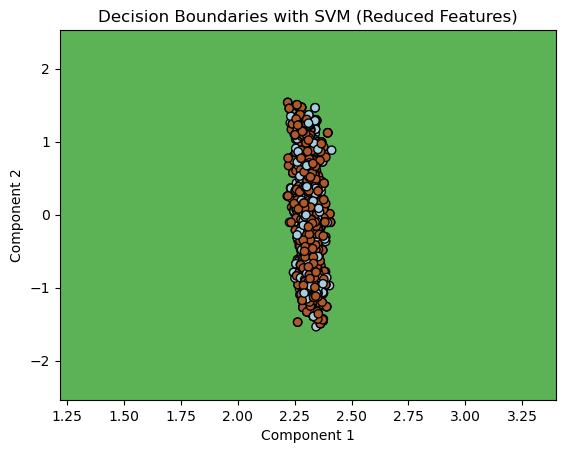

In [34]:
def plot_decision_boundaries(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.get_cmap('Paired'))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.get_cmap('Paired'))
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# Plot decision boundaries with the new SVM model trained on the reduced features
plot_decision_boundaries(X_train_svd, y_train, svm_svd, 'Decision Boundaries with SVM (Reduced Features)')


In [35]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVM with different kernels
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],  # Only relevant for polynomial kernel
    'gamma': ['scale', 'auto']  # Only relevant for RBF kernel
}

# Initialize SVM
svm = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_svd, y_train)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.71


In [36]:
# Train and evaluate SVM with different kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel, C=grid_search.best_params_['C'],
              degree=grid_search.best_params_.get('degree', 3),
              gamma=grid_search.best_params_.get('gamma', 'scale'))
    svm.fit(X_train_svd, y_train)
    y_pred = svm.predict(X_test_svd)
    
    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_test, y_pred, average='weighted'))



Kernel: linear
Accuracy: 0.6675
Precision: 0.44555625
Recall: 0.6675
F1-score: 0.5344002998500749

Kernel: poly
Accuracy: 0.6675
Precision: 0.44555625
Recall: 0.6675
F1-score: 0.5344002998500749

Kernel: rbf
Accuracy: 0.6675
Precision: 0.44555625
Recall: 0.6675
F1-score: 0.5344002998500749


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
